Импортируем библиотеки

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

Зададим точки:

In [2]:
x, y = [np.arange(-10, 10.2, 0.2, dtype=np.float64), np.arange(-10, 10.2, 0.2, dtype=np.float64)] # два вектора для точек
x, y = np.meshgrid(x, y) # превратим векторы в плоскоть

In [3]:
iter = lambda item:[
                        np.max(data)
                        for data in list(zip(item[0], item[1]))
                    ]
z = np.matrix(
    [
        iter(data)
        for data in list(zip(np.abs(x), np.abs(y)))
    ]
) # Вычислим z по функции f
z.astype(np.float64) # Приведём данные к типу float
z

matrix([[10. , 10. , 10. , ..., 10. , 10. , 10. ],
        [10. ,  9.8,  9.8, ...,  9.8,  9.8, 10. ],
        [10. ,  9.8,  9.6, ...,  9.6,  9.8, 10. ],
        ...,
        [10. ,  9.8,  9.6, ...,  9.6,  9.8, 10. ],
        [10. ,  9.8,  9.8, ...,  9.8,  9.8, 10. ],
        [10. , 10. , 10. , ..., 10. , 10. , 10. ]])

Выведем фигуру:

C:\Users\Filic\AppData\Local\Temp\ipykernel_1240\4259860281.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


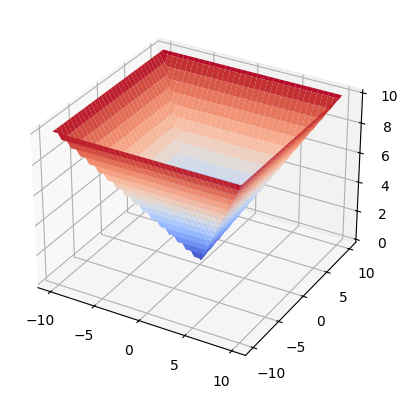

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
fig.title = 'Пирамида'
fig.show()


In [5]:
print('Определитель Матрицы Z:', np.linalg.det(z))

Определитель Матрицы Z: 0.0


Добавим к матрице еденичную:

In [6]:
Z = z + np.eye(len(z))
Z

matrix([[11. , 10. , 10. , ..., 10. , 10. , 10. ],
        [10. , 10.8,  9.8, ...,  9.8,  9.8, 10. ],
        [10. ,  9.8, 10.6, ...,  9.6,  9.8, 10. ],
        ...,
        [10. ,  9.8,  9.6, ..., 10.6,  9.8, 10. ],
        [10. ,  9.8,  9.8, ...,  9.8, 10.8, 10. ],
        [10. , 10. , 10. , ..., 10. , 10. , 11. ]])

Обратная матрица:

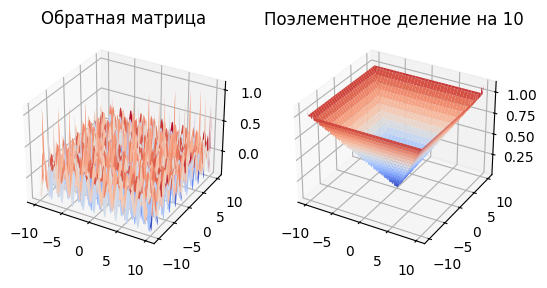

In [7]:
fig = pylab.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, np.linalg.inv(Z), cmap='coolwarm')
pylab.title('Обратная матрица')

axx = fig.add_subplot(122, projection='3d')
axx.plot_surface(x, y, Z/10, cmap='coolwarm')
pylab.title('Поэлементное деление на 10')


pylab.show()

c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\numpy\linalg\linalg.py:680: RuntimeWarning: overflow encountered in matmul
  result = z if result is None else fmatmul(result, z)
c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\numpy\linalg\linalg.py:677: RuntimeWarning: overflow encountered in matmul
  z = a if z is None else fmatmul(z, z)
c:\Users\Filic\.conda\envs\pythorch\Lib\site-packages\numpy\linalg\linalg.py:680: RuntimeWarning: invalid value encountered in matmul
  result = z if result is None else fmatmul(result, z)
C:\Users\Filic\AppData\Local\Temp\ipykernel_1240\2489049959.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  axx.plot_surface(x, y, expm(np.array([np.matrix(

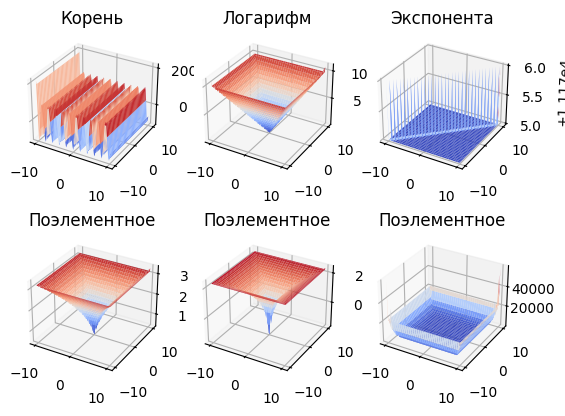

In [8]:
fig = pylab.figure()
ax = fig.add_subplot(231, projection='3d')
ax.plot_surface(x, y, Z@np.sqrt(np.diag(np.linalg.eig(Z)[0]))@np.linalg.inv(Z), cmap='coolwarm')
pylab.title('Корень')

axx = fig.add_subplot(234, projection='3d')
axx.plot_surface(x, y, np.sqrt(Z), cmap='coolwarm')
pylab.title('Поэлементное')

def logm(data):
    out = data[0]
    for i in range(1,len(data)):
        out+=i
    return(out)

axx = fig.add_subplot(232, projection='3d')
axx.plot_surface(x, y, logm(np.array([(-1)**(i+1)*np.matrix((Z-np.ones(len(Z)))**i/i) for i in range(1,15000)])), cmap='coolwarm')
pylab.title('Логарифм')

axx = fig.add_subplot(235, projection='3d')
axx.plot_surface(x, y, np.log(Z), cmap='coolwarm')
pylab.title('Поэлементное')


def expm(data):
    out = data[0]
    for i in range(1,len(data)):
        out+=i
    return(out)


axx = fig.add_subplot(233, projection='3d')
axx.plot_surface(x, y, expm(np.array([np.matrix(Z**i/np.math.factorial(i)) for i in range(150)])), cmap='coolwarm')
pylab.title('Экспонента')

axx = fig.add_subplot(236, projection='3d')
axx.plot_surface(x, y, np.exp(Z), cmap='coolwarm')
pylab.title('Поэлементное')


pylab.show()

Срез

(101, 101)


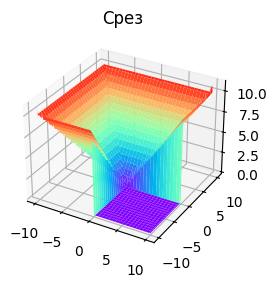

In [9]:
Z[:50,50:]=0
print(Z.shape)
fig = pylab.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x, y, Z, cmap='rainbow')
pylab.title('Cрез')

pylab.show()

9 конусов

C:\Users\Filic\AppData\Local\Temp\ipykernel_1240\2501592807.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


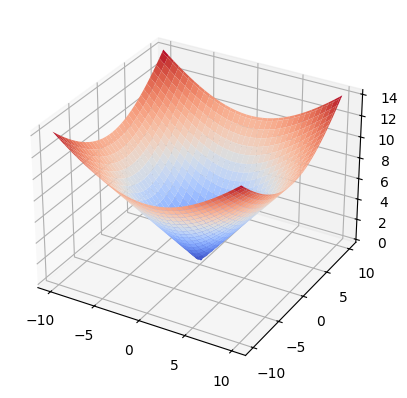

In [10]:
x, y = [np.arange(-10, 10.2, 0.2)]*2
x, y = np.meshgrid(x, y)
z = np.sqrt(x**2+y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
fig.title = '1 конус'
fig.show()

In [11]:
print(z)

[[14.14213562 14.0014285  13.86217876 ... 13.86217876 14.0014285
  14.14213562]
 [14.0014285  13.85929291 13.71860051 ... 13.71860051 13.85929291
  14.0014285 ]
 [13.86217876 13.71860051 13.5764502  ... 13.5764502  13.71860051
  13.86217876]
 ...
 [13.86217876 13.71860051 13.5764502  ... 13.5764502  13.71860051
  13.86217876]
 [14.0014285  13.85929291 13.71860051 ... 13.71860051 13.85929291
  14.0014285 ]
 [14.14213562 14.0014285  13.86217876 ... 13.86217876 14.0014285
  14.14213562]]


In [12]:
x, y = [np.arange(0, 60.6, 0.2)]*2
x, y = np.meshgrid(x, y)
z = np.kron(np.ones((3,3)), z)

C:\Users\Filic\AppData\Local\Temp\ipykernel_1240\1688285249.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


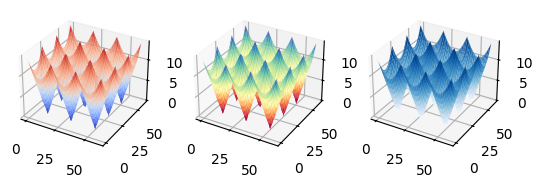

In [13]:
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')
fig.title = '1 конус'

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(x, y, z, cmap='Spectral')
fig.title = '1 конус'

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(x, y, z, cmap='Blues')
fig.title = '1 конус'

fig.show()